In [56]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [57]:
def generate_data():
    np.random.seed(42)
    data = {
        'product_id': range(1, 21),
        'product_name': [f'Product {i}' for i in range(1, 21)],
        'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
        'units_sold': np.random.poisson(lam=20, size=20),
        'sale_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
    }
    return pd.DataFrame(data)

sales_data = generate_data()

print("sales data")
print(sales_data)


sales data
    product_id product_name     category  units_sold  sale_date
0            1    Product 1         Home          25 2023-01-01
1            2    Product 2       Sports          15 2023-01-02
2            3    Product 3  Electronics          17 2023-01-03
3            4    Product 4         Home          19 2023-01-04
4            5    Product 5         Home          21 2023-01-05
5            6    Product 6       Sports          17 2023-01-06
6            7    Product 7  Electronics          19 2023-01-07
7            8    Product 8  Electronics          16 2023-01-08
8            9    Product 9         Home          21 2023-01-09
9           10   Product 10     Clothing          21 2023-01-10
10          11   Product 11         Home          17 2023-01-11
11          12   Product 12         Home          22 2023-01-12
12          13   Product 13         Home          14 2023-01-13
13          14   Product 14         Home          17 2023-01-14
14          15   Product 15  

In [58]:
sales_data.to_csv('sales_data.csv',index=False)

In [59]:
#path location
import os
os.getcwd()

'c:\\Users\\faiz ullah\\.vscode\\0. testing folder 10 30 am\\sales project'

In [60]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

#display descriptive statistics
print("\nDescriptive staistics for units sold:")
print(descriptive_stats)

#additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales= sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

# group by category and calculate total and avg sales 
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['category','total units sold','avg units sold','std dev of units sold']

#display the resu;ts 
print("\nstatistical analysis :")
print(f"mean units sold:{mean_sales}")
print(f"median units sold:{median_sales}")
print(f"mode units sold:{mode_sales}")
print(f"variance of units sold:{variance_sales}")
print(f"standard dev of units sold :{std_deviation_sales}")
print("\ncategory statistics:")
print(category_stats)


Descriptive staistics for units sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

statistical analysis :
mean units sold:18.8
median units sold:18.5
mode units sold:17
variance of units sold:10.90526315789474
standard dev of units sold :3.3023117899275864

category statistics:
      category  total units sold  avg units sold  std dev of units sold
0     Clothing                21       21.000000                    NaN
1  Electronics                73       18.250000               2.217356
2         Home               181       20.111111               3.723051
3       Sports               101       16.833333               2.714160


In [61]:
'''st.write(f"Mean Units Sold: {mean_sales}")
st.write(f"Median Units Sold: {median_sales}")
st.write(f"Mode Units Sold: {mode_sales}")'''

'st.write(f"Mean Units Sold: {mean_sales}")\nst.write(f"Median Units Sold: {median_sales}")\nst.write(f"Mode Units Sold: {mode_sales}")'

In [62]:
#confidence interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error = t_score*sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean +margin_of_error)
print("\nconfidence interval for the mean of the units solds:")
print(confidence_interval)




confidence interval for the mean of the units solds:
(17.254470507823573, 20.34552949217643)


In [63]:
#confidence interval for the mean of units sold
confidence_level = 0.99
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error = t_score*sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean +margin_of_error)
print("\nconfidence interval for the mean of the units solds:")
print(confidence_interval)




confidence interval for the mean of the units solds:
(16.687430485978535, 20.912569514021467)


In [64]:
#hypothesis testing(t-test)

t_statistic,p_value =stats.ttest_1samp(sales_data['units_sold'],20)

print("\nHypothesis testing (t_test):")
print(f"T-statistic:{t_statistic},{p_value}")

if p_value < 0.05:
    print("reject the null hypothesis : the mean units sold is significantly different from 20.")
else:
    print("fail to reject the null hypothesis : the mean units sold is not significantly different from 20. ")







Hypothesis testing (t_test):
T-statistic:-1.6250928099424466,0.12061572226781002
fail to reject the null hypothesis : the mean units sold is not significantly different from 20. 


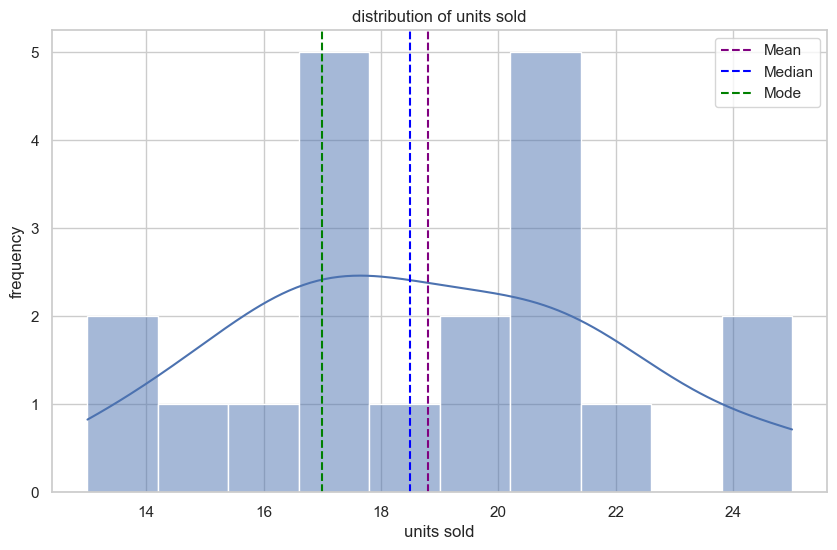

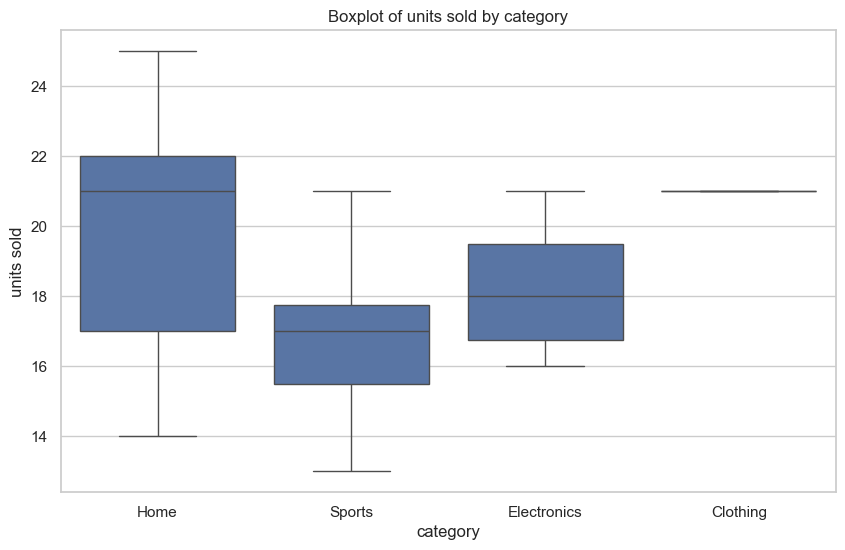

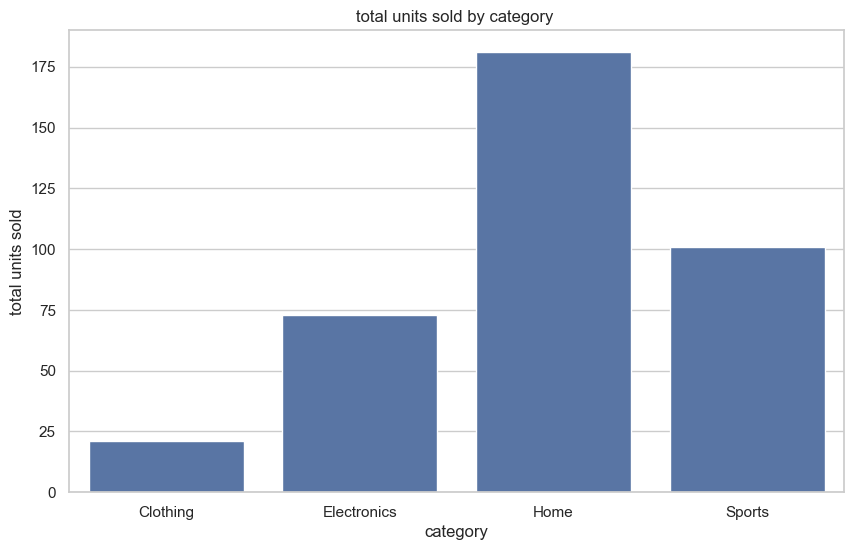

In [65]:
# visualizations
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10,kde=True)
plt.title('distribution of units sold')
plt.xlabel('units sold')
plt.ylabel('frequency')
plt.axvline(mean_sales,color='purple',linestyle='--',label='Mean')
plt.axvline(median_sales,color='blue',linestyle='--',label='Median')
plt.axvline(mode_sales,color='green',linestyle='--',label='Mode')
plt.legend()
plt.show()

# boxplot for units sold by category 
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='units_sold',data=sales_data)
plt.title('Boxplot of units sold by category')
plt.xlabel('category')
plt.ylabel('units sold')
plt.show()

# barplot for total units sold by category 
plt.figure(figsize=(10,6))
sns.barplot(x='category',y='total units sold',data=category_stats)
plt.title('total units sold by category ')
plt.xlabel('category')
plt.ylabel('total units sold')
plt.show()

